In [1]:
import pandas as pd
import numpy as np

## Loading the misconducts

In [2]:
fpath = "../data/related_behaviors_works/included_works_dealing_w_related_behaviors.csv"

In [7]:
df = pd.read_csv(fpath)

In [8]:
df.head()

,Url,Title,NOTES,Year,Author,Topic - Misconduct,Publication Title,Item Type,ISBN,ISSN,...,System,Code,Code Number,Section,Session,Committee,History,Legislative Body,Unnamed: 88,Key
0,NaN,Hyperauthorship: A postmodern perversion or ev...,NaN,2001,B. Cronin,Authorship,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.scopus.com/inward/record.uri?eid=2...,Up for grabs - Authors are a dime a dozen: The...,NaN,2004,"Lazar, R.",Authorship,"Acta Paediatrica, International Journal of Pae...",journalArticle,NaN,8035253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EJIPJ85P
2,https://www.scopus.com/inward/record.uri?eid=2...,The White Bull effect: Abusive coauthorship an...,NaN,2005,"Kwok, L. S.",Authorship,Journal of Medical Ethics,journalArticle,NaN,3066800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DKXVMS7Z
3,https://www.scopus.com/inward/record.uri?eid=2...,"Fostering integrity in research: Definitions, ...",NaN,2006,"Steneck, Nicholas H.","Flawed results, Authorship, Plagiarism, Falsif...",Science and Engineering Ethics,journalArticle,NaN,13533452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QDLDXKVB
4,https://www.scopus.com/inward/record.uri?eid=2...,Limiting authorship in Indian pediatrics: An i...,corrective actions imposing limits to authorsh...,2007,"Gupta, Piyush; Sharma, Bhawna; Choudhury, Panna",Authorship,Indian Pediatrics,journalArticle,NaN,196061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7P3VETCL


In [9]:
misconducts = df["Topic - Misconduct"].dropna()

In [10]:
misconducts

0                                            Authorship
1                                            Authorship
2                                            Authorship
3     Flawed results, Authorship, Plagiarism, Falsif...
4                                            Authorship
                            ...                        
74                                           Paper mill
75                          Paper mill, Retraction rate
76                                           Authorship
77           Falsification, Flawed results, Fabrication
78                                             Citation
Name: Topic - Misconduct, Length: 79, dtype: object

## Data pre-processing

In [11]:
mis2id = {}
id = 0

mis2cnt = {}
cnt = 0

for mis_occurrence in misconducts:
    for mis in mis_occurrence.split(","):
        if mis.strip() not in mis2id:
            mis2id[mis.strip()] = id
            id += 1

        mis2cnt[mis.strip()] = mis2cnt.get(mis.strip(), 0) + 1

In [12]:
mis2cnt

{'Authorship': 51,
 'Flawed results': 7,
 'Plagiarism': 12,
 'Falsification': 7,
 'Fabrication': 9,
 'Paper mill': 12,
 'Predatory journals': 10,
 'Retraction rate': 8,
 'Fake reviews': 6,
 'Citation': 20,
 'Suspicious editorial activity': 4}

In [13]:
mis2id

{'Authorship': 0,
 'Flawed results': 1,
 'Plagiarism': 2,
 'Falsification': 3,
 'Fabrication': 4,
 'Paper mill': 5,
 'Predatory journals': 6,
 'Retraction rate': 7,
 'Fake reviews': 8,
 'Citation': 9,
 'Suspicious editorial activity': 10}

In [14]:
# build also the inverse dictionary
id2mis = {v: k for k, v in mis2id.items()}

In [15]:
id2mis

{0: 'Authorship',
 1: 'Flawed results',
 2: 'Plagiarism',
 3: 'Falsification',
 4: 'Fabrication',
 5: 'Paper mill',
 6: 'Predatory journals',
 7: 'Retraction rate',
 8: 'Fake reviews',
 9: 'Citation',
 10: 'Suspicious editorial activity'}

In [16]:
hedges = []

for mis_occurrence in misconducts:
    he = []

    for mis in mis_occurrence.split(","):
        mis = mis.strip()
        he.append(mis2id[mis])

    hedges.append(tuple(he))

In [17]:
hedges

[(0,),
 (0,),
 (0,),
 (1, 0, 2, 3, 4),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (5,),
 (0,),
 (0,),
 (1, 6, 7, 3, 5),
 (6,),
 (0, 6, 8, 7, 2, 3, 4, 1),
 (0,),
 (0, 2, 3, 4, 9),
 (0,),
 (5, 1, 0, 7, 8),
 (0, 2),
 (8, 0, 7),
 (0, 2, 7, 8),
 (2, 6, 5, 0),
 (9,),
 (0,),
 (0,),
 (9,),
 (0, 9),
 (0,),
 (0,),
 (0,),
 (4, 5, 10, 0, 6),
 (0,),
 (10,),
 (9,),
 (7,),
 (5,),
 (9,),
 (7, 4, 0, 2, 8, 3),
 (9,),
 (0,),
 (0,),
 (9,),
 (5,),
 (0,),
 (9,),
 (0, 9),
 (0,),
 (6, 1, 3, 4, 2),
 (2,),
 (0, 2),
 (0, 9, 2),
 (0,),
 (0,),
 (6, 9),
 (0, 9),
 (9,),
 (0,),
 (0,),
 (9,),
 (9, 6, 10),
 (5,),
 (9,),
 (1, 6, 9, 2, 0, 4),
 (0,),
 (0, 5),
 (6,),
 (0,),
 (8,),
 (0,),
 (5, 9, 0, 4, 10),
 (0,),
 (0,),
 (5,),
 (5, 7),
 (0,),
 (3, 1, 4),
 (9,)]

## Build the hypergraph w/ hypergraphx

In [127]:
import hypergraphx as hgx

In [128]:
h = hgx.Hypergraph(hedges)

In [129]:
print(h)

Hypergraph with 16 nodes and 32 edges.
Distribution of hyperedge sizes: {4: 3, 1: 9, 2: 6, 5: 5, 3: 5, 7: 1, 6: 2, 8: 1}


In [130]:
for he in h.get_edges():
    print(he)

(0, 1, 2, 3)
(2,)
(1,)
(4, 5)
(3, 5)
(3,)
(0, 1, 6, 7, 8)
(5,)
(0, 3, 9)
(2, 3, 6, 10, 11)
(0, 1, 3, 4, 6, 8, 12)
(4,)
(0, 3, 10, 11)
(1, 4, 5, 13)
(11,)
(1, 2, 6, 7, 10, 14)
(0,)
(3, 4)
(0, 1, 3, 7, 8, 10, 11, 12)
(0, 3, 4)
(1, 4)
(3, 4, 14)
(3, 10, 11)
(13,)
(0, 3, 6, 7, 8)
(10,)
(2, 10, 15)
(0, 3)
(0, 3, 4, 7, 8)
(2, 3)
(2, 3, 4, 8, 13)
(0, 3, 7, 8, 10, 11)


In [131]:
# let's attach metadata to nodes
for n in h.get_nodes():
    h.set_node_metadata(n, {"misconduct": id2mis[n]})

## Build the hypergraph w/ hypernetx

In [19]:
import hypernetx as hnx

In [20]:
from collections import Counter

# count the number of occurences of each hyperedge in hedges
hedge_counts = Counter(hedges)

In [21]:
hedge_counts

Counter({(0,): 33,
         (9,): 11,
         (5,): 5,
         (0, 9): 3,
         (6,): 2,
         (0, 2): 2,
         (1, 0, 2, 3, 4): 1,
         (1, 6, 7, 3, 5): 1,
         (0, 6, 8, 7, 2, 3, 4, 1): 1,
         (0, 2, 3, 4, 9): 1,
         (5, 1, 0, 7, 8): 1,
         (8, 0, 7): 1,
         (0, 2, 7, 8): 1,
         (2, 6, 5, 0): 1,
         (4, 5, 10, 0, 6): 1,
         (10,): 1,
         (7,): 1,
         (7, 4, 0, 2, 8, 3): 1,
         (6, 1, 3, 4, 2): 1,
         (2,): 1,
         (0, 9, 2): 1,
         (6, 9): 1,
         (9, 6, 10): 1,
         (1, 6, 9, 2, 0, 4): 1,
         (0, 5): 1,
         (8,): 1,
         (5, 9, 0, 4, 10): 1,
         (5, 7): 1,
         (3, 1, 4): 1})

In [22]:
# hedges_set = list(hedge_counts.keys())

hedges_set = []
hedges_weights = []

# sort the hedges by their counts
sorted_hedge_counts = dict(sorted(hedge_counts.items(), key=lambda item: item[1], reverse=True))

for he, count in sorted_hedge_counts.items():
    print(he, count)

    hedges_set.append(he)
    hedges_weights.append(count)

(0,) 33
(9,) 11
(5,) 5
(0, 9) 3
(6,) 2
(0, 2) 2
(1, 0, 2, 3, 4) 1
(1, 6, 7, 3, 5) 1
(0, 6, 8, 7, 2, 3, 4, 1) 1
(0, 2, 3, 4, 9) 1
(5, 1, 0, 7, 8) 1
(8, 0, 7) 1
(0, 2, 7, 8) 1
(2, 6, 5, 0) 1
(4, 5, 10, 0, 6) 1
(10,) 1
(7,) 1
(7, 4, 0, 2, 8, 3) 1
(6, 1, 3, 4, 2) 1
(2,) 1
(0, 9, 2) 1
(6, 9) 1
(9, 6, 10) 1
(1, 6, 9, 2, 0, 4) 1
(0, 5) 1
(8,) 1
(5, 9, 0, 4, 10) 1
(5, 7) 1
(3, 1, 4) 1


In [23]:
sorted_hedge_counts.values()

dict_values([33, 11, 5, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
def get_labels(he):
    return tuple(id2mis[n] for n in he)

In [25]:
hedges_set_labels = [get_labels(he) for he in hedges_set]

In [26]:
hedges_set_labels

[('Authorship',),
 ('Citation',),
 ('Paper mill',),
 ('Authorship', 'Citation'),
 ('Predatory journals',),
 ('Authorship', 'Plagiarism'),
 ('Flawed results',
  'Authorship',
  'Plagiarism',
  'Falsification',
  'Fabrication'),
 ('Flawed results',
  'Predatory journals',
  'Retraction rate',
  'Falsification',
  'Paper mill'),
 ('Authorship',
  'Predatory journals',
  'Fake reviews',
  'Retraction rate',
  'Plagiarism',
  'Falsification',
  'Fabrication',
  'Flawed results'),
 ('Authorship', 'Plagiarism', 'Falsification', 'Fabrication', 'Citation'),
 ('Paper mill',
  'Flawed results',
  'Authorship',
  'Retraction rate',
  'Fake reviews'),
 ('Fake reviews', 'Authorship', 'Retraction rate'),
 ('Authorship', 'Plagiarism', 'Retraction rate', 'Fake reviews'),
 ('Plagiarism', 'Predatory journals', 'Paper mill', 'Authorship'),
 ('Fabrication',
  'Paper mill',
  'Suspicious editorial activity',
  'Authorship',
  'Predatory journals'),
 ('Suspicious editorial activity',),
 ('Retraction rate',),

In [27]:
h = hnx.Hypergraph(hedges_set_labels) #, edge_attrs={"label": hedges_set_labels})

In [28]:
print(h.dataframe)

    edges            nodes  weight misc_properties
0       0       Authorship       1              {}
1       1         Citation       1              {}
2       2       Paper mill       1              {}
3       3       Authorship       1              {}
4       3         Citation       1              {}
..    ...              ...     ...             ...
88     27       Paper mill       1              {}
89     27  Retraction rate       1              {}
90     28    Falsification       1              {}
91     28   Flawed results       1              {}
92     28      Fabrication       1              {}

[93 rows x 4 columns]


### Analyses

In [29]:
# sort the nodes ids alphabetically
sorted_node_ids = sorted(h.nodes())
sorted_node_ids

['Authorship',
 'Citation',
 'Fabrication',
 'Fake reviews',
 'Falsification',
 'Flawed results',
 'Paper mill',
 'Plagiarism',
 'Predatory journals',
 'Retraction rate',
 'Suspicious editorial activity']

In [30]:
h.incidences.items

{(0, 'Authorship'),
 (1, 'Citation'),
 (2, 'Paper mill'),
 (3, 'Authorship'),
 (3, 'Citation'),
 (4, 'Predatory journals'),
 (5, 'Authorship'),
 (5, 'Plagiarism'),
 (6, 'Authorship'),
 (6, 'Fabrication'),
 (6, 'Falsification'),
 (6, 'Flawed results'),
 (6, 'Plagiarism'),
 (7, 'Falsification'),
 (7, 'Flawed results'),
 (7, 'Paper mill'),
 (7, 'Predatory journals'),
 (7, 'Retraction rate'),
 (8, 'Authorship'),
 (8, 'Fabrication'),
 (8, 'Fake reviews'),
 (8, 'Falsification'),
 (8, 'Flawed results'),
 (8, 'Plagiarism'),
 (8, 'Predatory journals'),
 (8, 'Retraction rate'),
 (9, 'Authorship'),
 (9, 'Citation'),
 (9, 'Fabrication'),
 (9, 'Falsification'),
 (9, 'Plagiarism'),
 (10, 'Authorship'),
 (10, 'Fake reviews'),
 (10, 'Flawed results'),
 (10, 'Paper mill'),
 (10, 'Retraction rate'),
 (11, 'Authorship'),
 (11, 'Fake reviews'),
 (11, 'Retraction rate'),
 (12, 'Authorship'),
 (12, 'Fake reviews'),
 (12, 'Plagiarism'),
 (12, 'Retraction rate'),
 (13, 'Authorship'),
 (13, 'Paper mill'),
 (13

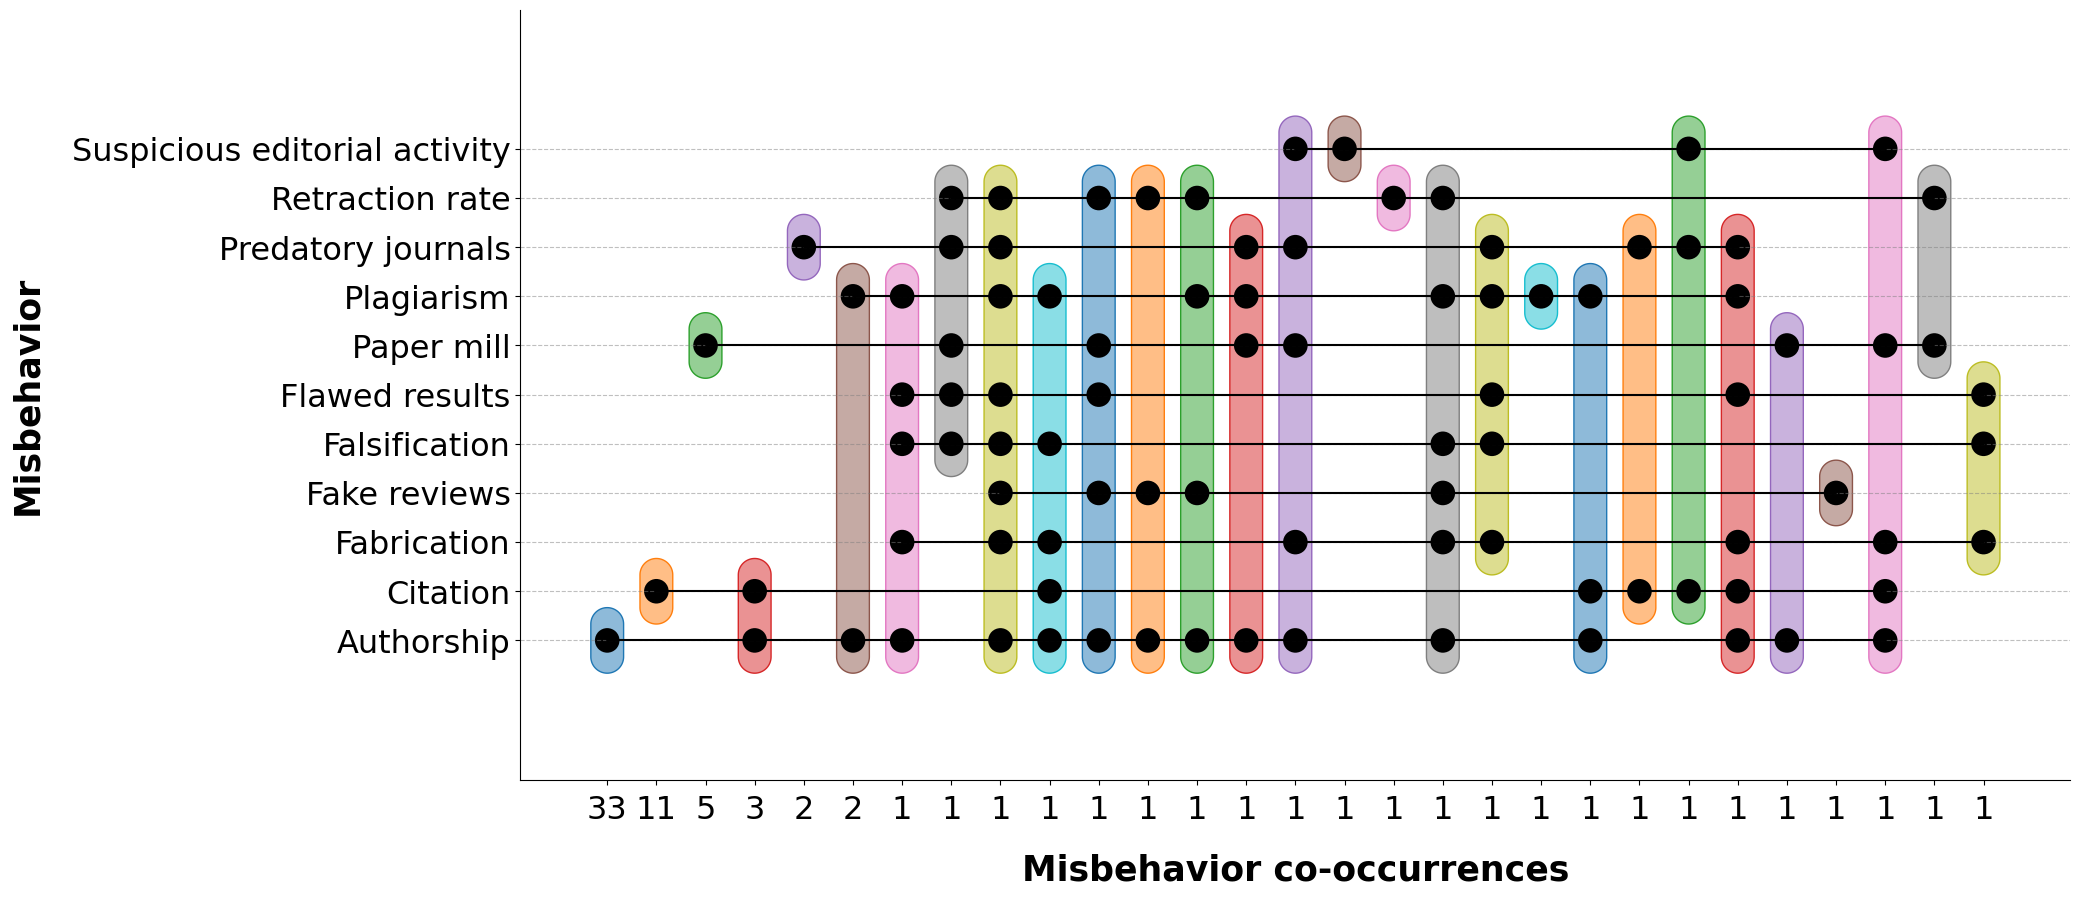

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel('Misbehavior co-occurrences', fontsize = 25, fontweight='bold')
ax.set_ylabel('Misbehavior', fontsize = 25, fontweight='bold')

# add some padding between the label of the axis and the axis itself
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

# increase the size of the x-labels and y-labels
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)

# add some padding between the ticks and the labels
ax.tick_params(axis='x', pad=7)

# add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)


hnx.draw_incidence_upset(
    h, 
    #node_labels_kwargs=node_labels,
    node_labels_on_axis=True,
    node_order=sorted_node_ids,
    edge_labels=sorted_hedge_counts.values(),
    edge_order=h.edges.items,
    fill_edges=True,
    #fill_edge_alpha=-0.8,
)

In [181]:
# hnx.draw_incidence_upset(h2.dual())

In [182]:
# hnx.draw_bipartite_using_euler(h1)